Tâche 8

- déterminer la bande interdite
- trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion (insérer une figure indiquant la dispersion par des flèches)
- calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique

In [38]:
from matplotlib import pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure.bandstructure import BandStructure
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

In [39]:
with MPRester("2HJyrqCBxbcTKw7d") as m:
    structure = m.get_structure_by_material_id("mp-30459")    
    structureBand =  m.get_bandstructure_by_material_id("mp-30459") #donnée sur la bande de la structure


1) déterminer la bande interdite

C'est une bande : Indirect
Valeur de cette bande est : 0.1869000000000005eV
Vecteur de transition : \Gamma-X


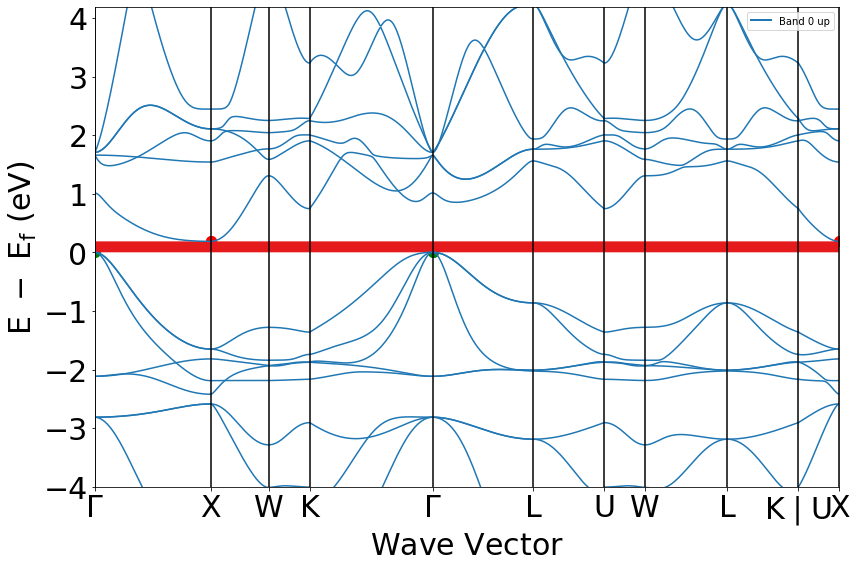

In [60]:
bplot = BSPlotter(structureBand)
bplot.get_plot(vbm_cbm_marker=True) #plot Structure de bande et densité d'états (marqueur de limite bande interdite)

bande = structureBand.get_band_gap()
donnees= bplot.bs_plot_data()
d = data.get('ticks').get('distance')

plt.fill_between(np.linspace(0,d[-1],1000),donnees['vbm'][0][1],donnees['cbm'][0][1]) #plot la bande interdite


energie = str(bande['energy'])
vecteur = str(bande['transition'])
print("C'est une bande : Indirect" )
print( "Valeur de cette bande est : " + energie + "eV")
print( "Vecteur de transition : " + vecteur)
 


2) trouver la direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion (insérer une figure indiquant la dispersion par des flèches)

In [52]:
print("Bandes contenant le max de la bande de valence :" , structureBand.get_vbm()['band_index'])
print("On prend comme bande de valence max : 13")
print("Bandes contenant le min de la bande de conduction :" ,structureBand.get_cbm()['band_index'])

Bandes contenant le max de la bande de valence : defaultdict(<class 'list'>, {<Spin.up: 1>: [13, 14, 15]})
On prend comme bande de valence max : 13
Bandes contenant le min de la bande de conduction : defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})


3) calculer la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique

In [70]:

E_vbm = structureBand.get_vbm()['energy']
kpoint_vbm = vbm['kpoint'].cart_coords
E_0 = data.get('zero_energy')


cbm = structureBand.get_cbm()
E_cbm = cbm['energy']
kpoint_cbm = cbm['kpoint'].cart_coords

print('Energie du minimum de la bande de conduction = ',E_cbm,'eV')
print('sur le graphe : E-Ef = ', (E_cbm-E_0))
print('Vecteur k (coordonnées cartésiennes) =',kpoint_cbm)
print(cbm.get('band_index'))



h_bar = 6.5821e-16
m_electron = 9.11e-31
m_vbm = (h_bar**2 * (kpoint_vbm[0]**2+kpoint_vbm[1]**2+kpoint_vbm[2]**2))/(2*abs(E_vbm))
m_cbm = (h_bar**2 * (kpoint_cbm[0]**2+kpoint_cbm[1]**2+kpoint_cbm[2]**2))/(2*E_cbm)
print('La masse effective au sommet de la dernière bande de valence =', m_vbm, 'kg', '=',  m_vbm/m_electron, 'm_e')
print('La masse effective à la base de la première bande de conduction =', m_cbm, 'kg')

Energie du minimum de la bande de conduction =  6.8665 eV
sur le graphe : E-Ef =  0.1869000000000005
Vecteur k (coordonnées cartésiennes) = [0.         1.00436346 0.        ]
defaultdict(<class 'list'>, {<Spin.up: 1>: [16]})
La masse effective au sommet de la dernière bande de valence = 0.0 kg = 0.0 m_e
La masse effective à la base de la première bande de conduction = 3.1823309246142677e-32 kg
